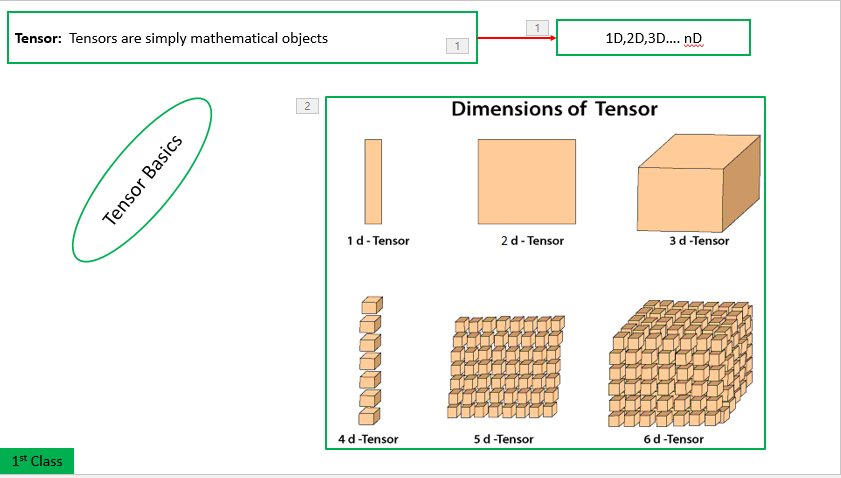

Tensor Basics

In [ ]:
import torch


x = torch.empty(1,5) 
print(x)
x = torch.empty(3) 
print(x)
x = torch.empty(2,3) 
print(x)
x = torch.empty(2,2,3) 
print(x)
x = torch.empty(2,2,2,3) # tensor, 4 dimensions
print(x)



# torch.ones(size), fill with 1
x = torch.ones(5, 3)
print(x)


print(x.size())


print(x.dtype)


x = torch.zeros(5, 3, dtype=torch.int64)
print(x)

# check type
print(x.dtype)



x = torch.tensor([5.5, 3])
print(x.size())
print(type(x))

x = torch.tensor([5.5, 3], requires_grad=True)

# Operations
y = torch.rand(2, 2)
x = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x,y)


y = torch.rand(2, 2)
x = torch.rand(2, 2)
y.add_(x)

# substraction
y = torch.rand(2, 2)
x = torch.rand(2, 2)
z = x - y
z = torch.sub(x, y)

# multiplication
y = torch.rand(2, 2)
x = torch.rand(2, 2)
z = x * y
z = torch.mul(x,y)

# division
y = torch.rand(2, 2)
x = torch.rand(2, 2)
z = x / y
z = torch.div(x,y)

# Slicing
x = torch.rand(5,3)
print(x)
print(x[:, 0]) # all rows, column 0
print(x[1, :]) # row 1, all columns
print(x[1,1]) # element at 1, 1


print(x[1,1].item())

# Reshape with torch.view()
x = torch.randn(4, 4)
print(x)
y = x.view(16)
print(y)
z = x.view(-1, 8)  

print(z)
print(x.size(), y.size(), z.size())


a = torch.ones(5)
print(a)

b = a.numpy()
print(b)
print(type(b))


a.add_(1)
print(a)
print(b)

# numpy to torch with .from_numpy(x)
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
print(a)
print(b)

# again be careful when modifying
a += 1
print(a)
print(b)


if torch.cuda.is_available():
    device = torch.device("cuda")          
    y = torch.randn(2,3).to(device) 
    x = torch.ones(2,3).to(device)                      
    z = x + y



    # move to CPU again
    z.to("cpu")       # ``.to`` can also change dtype together!
    # z = z.numpy()



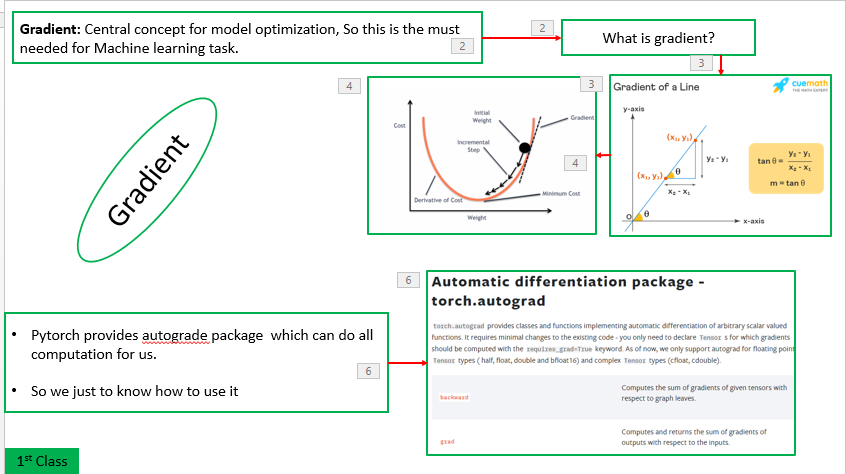

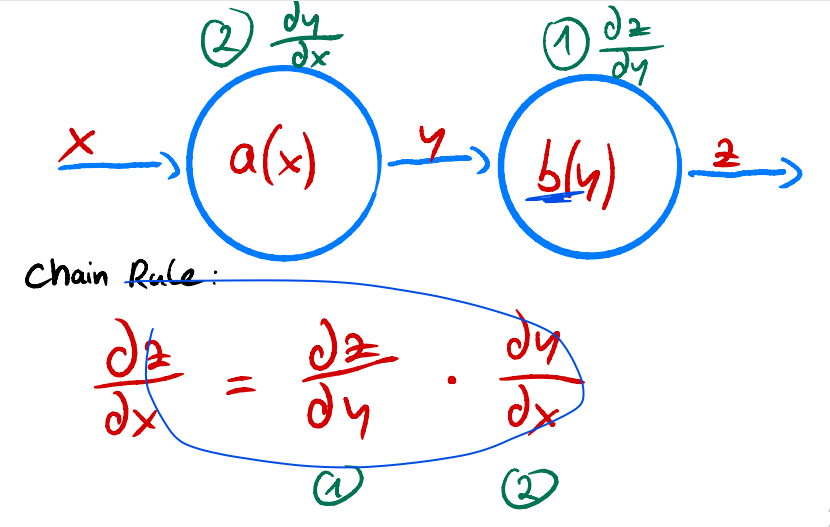

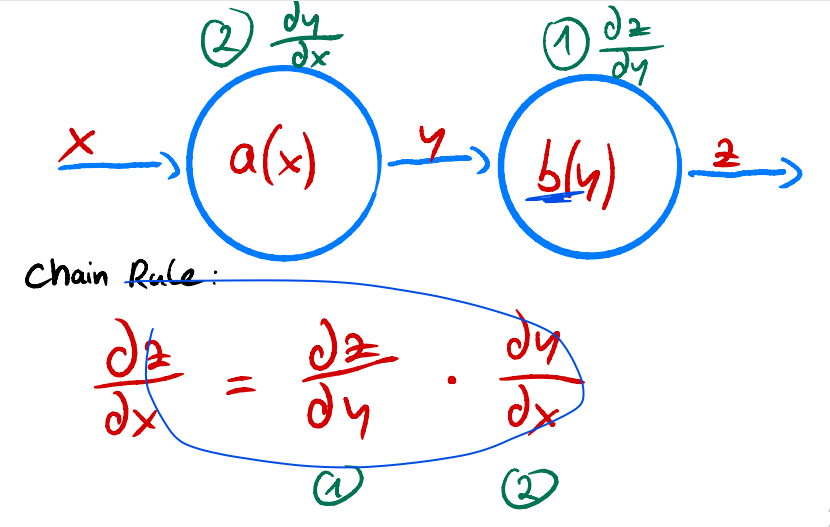

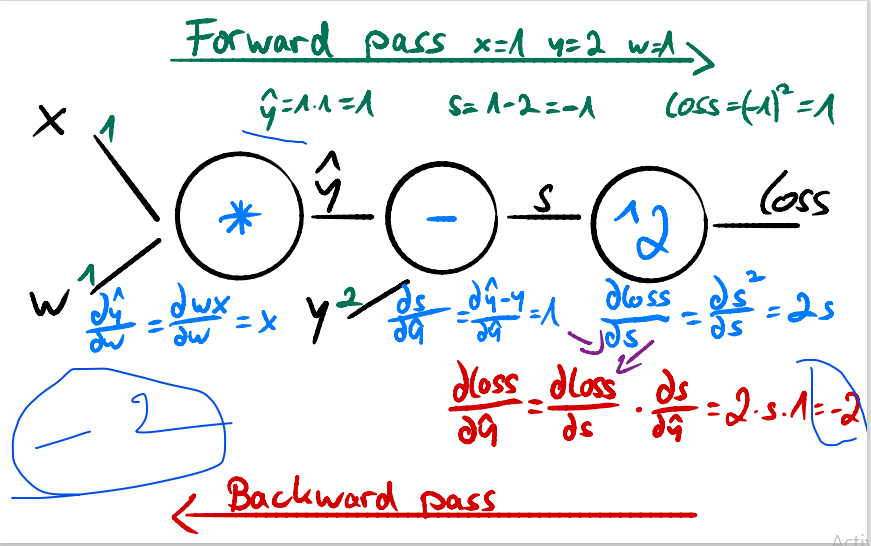

Backpropagation for gradient calculation

In [ ]:
import torch

x = torch.tensor(1.0)
y = torch.tensor(2.0)

# print(type(y))

w = torch.tensor(-1.0, requires_grad=True)


y_hat = w * x
s=y_hat-y
y_prime=s**2

loss = (y_prime - y)

print(loss)


loss.backward()
x=w.grad
print(w.grad)


w.grad.zero_()




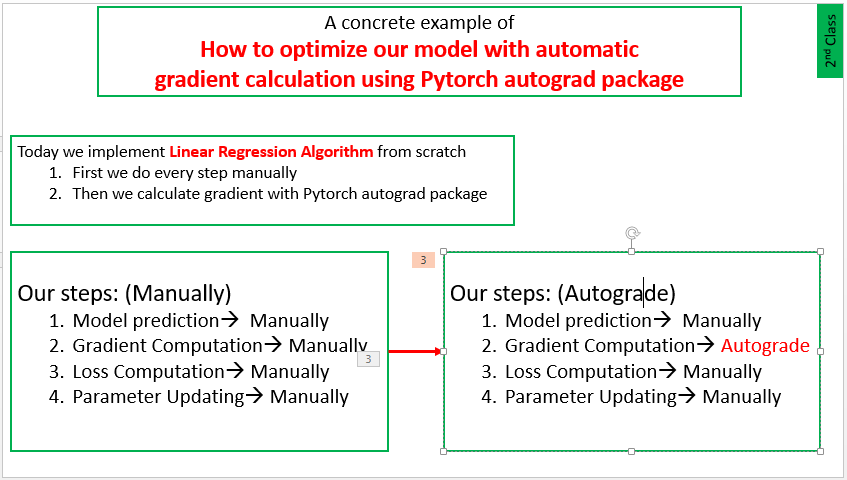

Our Step Manually

In [32]:
import numpy as np

# We implement Linear Regression whose prediction function is
# f= w*input

# We use We use Mean Square Error (MSE) as Loss Function. Loss Function Equation
# Loss= 1/N * (y_hat-y)**2

# Our Liner Reggression function
# f=3*x


# Dataset Creation
X= np.array([1,2,3,4,5], dtype=np.float32)
Y=np.array([3,6,9,12,15], dtype= np.float32)

w=0.0

# Prediction
def prediction(x):
    f=w*x
    return f

# Loss Function Design--> We use Mean Square Error (MSE)
def Loss(y, y_hat):
    loss = np.mean(((y_hat-y)**2))
    return loss

# Gradient Calculation
def gradient(x,y,y_hat):
    grad= np.mean(((2*x)*(y_hat-y)))
    # grad=np.mean(grad)
    return grad

print(f'Prediction Before Training: f(20)= {prediction(20): 0.3f}')
# Training
lr=0.001
iteration=500

for epoch in range(iteration):
    # prediction 
    y_hat=prediction(X)

    # Loss calculation
    loss=Loss(Y, y_hat)

    # Gradient Calculation
    grad=gradient(X, Y,  y_hat)

    # Weight Update
    w -= lr*grad

    if epoch % 100 ==0:
        print(f'epoch {epoch+1}: Weight= {w:.3f}, Loss= {loss:.5f}')

        # print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:.8f}')

print(f'Prediction After Training: f(20)= {prediction(20): 0.3f}')

Prediction Before Training: f(20)=  0.000
epoch 1: Weight= 0.066, Loss= 99.00000
epoch 101: Weight= 2.683, Loss= 1.15719
epoch 201: Weight= 2.966, Loss= 0.01353
epoch 301: Weight= 2.996, Loss= 0.00016
epoch 401: Weight= 3.000, Loss= 0.00000
Prediction After Training: f(20)=  59.999
